# FARSANA K S                          
## ASSIGNMENT III                                                                                                         - AOE 5132                

### QUESTION 1
### When a sub-atomic particle such as an electron or a photon enters into matter, it suffers different types of reactions (such as, Coulomb scattering, nuclear reactions, etc.) with the atomic and nuclear constituents of the material. In nuclear and particle physics, the interaction of subatomic particles is described by the differential cross section, 𝑑𝜎 (𝐸,𝜃,𝜙....), which essentially expresses the quantum probability for a reaction to occur. This is a function of the kinematic variables used to describe the reaction; i.e., the energy, scattering angles and so on. If the differential cross section is integrated over all scattering angles, then one has the total cross section, 𝜎0, which describes the probability for a reaction to occur (at energy E) regardless of the scattering angle. Each type of reaction has a corresponding cross section. These interactions occur randomly as the particle traverses the material, so one can ask:

### (a) What is the probability 𝑃𝑠(𝑥) for it to survive a certain distance 𝑥 before suffering an interaction?

### ANSWER

### Assume that there are $N_0$ number of particles having a fixed energy $E$ that enter the material.


### As the photon travels through the matter, there is a high chance of interaction with other atomic and nuclear constituents of the material. These sub-atomic interactions, that is, the quantum probability for a reaction to occur, increases as the distance travelled by the photon increases. So, the number of particles follow exponential distribution, that is a function of mean free path λ=(1/$σ_0$n) where n is the number density of scattering centres inside the material and $σ_0$ is the total cross-section.

### The number of particles remaining, after travelling a distance x is given as

### $N(x)$ = $N_0$ e<sup>−λx</sup> =$N_0$e<sup>-x/$σ_0$n</sup> ,

### The probability for it to survive a certain distance 𝑥 before suffering an interaction is:

### $Ps(x)$ = $(N(x)/N_0)$ = e<sup>−x/$σ_0$n</sup>

### QUESTION 2
### Demonstrate with an example the law of large numbers and the central limit theorem. 

### LAW OF LARGE NUMBERS

### The Law of Large Numbers states that as the sample size increases, the sample mean converges to the population mean. In other words, the larger the sample, the closer the sample mean gets to the true mean of the population.

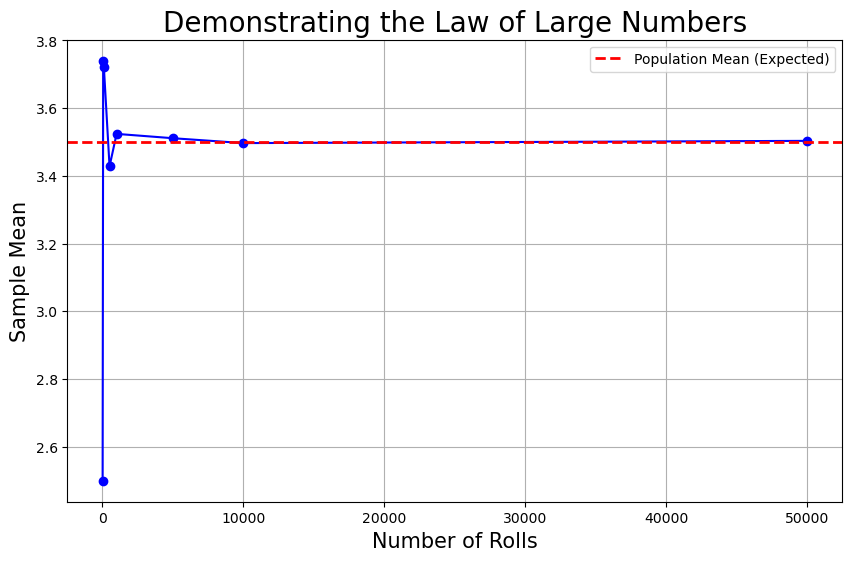

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
population_mean = 3.5  # Expected mean of a fair six-sided die
num_rolls = [10, 50, 100, 500, 1000, 5000, 10000, 50000]  # List of different numbers of rolls

# Initialize lists to store sample means
sample_means = []

# Simulate die rolls and calculate means for each number of rolls
for rolls in num_rolls:
    rolls_data = np.random.randint(1, 7, rolls)  # Simulate die rolls
    sample_mean = np.mean(rolls_data)  # Calculate sample mean
    sample_means.append(sample_mean)

# Plot sample means
plt.figure(figsize=(10, 6))
plt.plot(num_rolls, sample_means, marker='o', linestyle='-', color='b')
plt.axhline(population_mean, color='r', linestyle='dashed', linewidth=2, label='Population Mean (Expected)')
plt.xlabel('Number of Rolls',fontsize = 15)
plt.ylabel('Sample Mean',fontsize = 15)
plt.title('Demonstrating the Law of Large Numbers',fontsize = 20)
plt.legend()
plt.grid(True)
plt.show()


In [30]:
sample_means

[2.5, 3.74, 3.72, 3.428, 3.524, 3.5112, 3.4968, 3.50338]

### As the number of rolls increased, the sample mean has converged to the expected mean, which is the known population mean

### CENTRAL LIMIT THEOREM

In [7]:
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

def central_limit(size,number):
    m=[]
    for i in range(number):
        arr = ss.poisson.rvs(mu=1, size=size)
        m.append(np.mean(arr))
    plt.hist(m, bins=50 ,density=True)
    plt.xlabel("X",fontsize = 15)
    plt.ylabel("Frequency", fontsize = 15)
    plt.show()

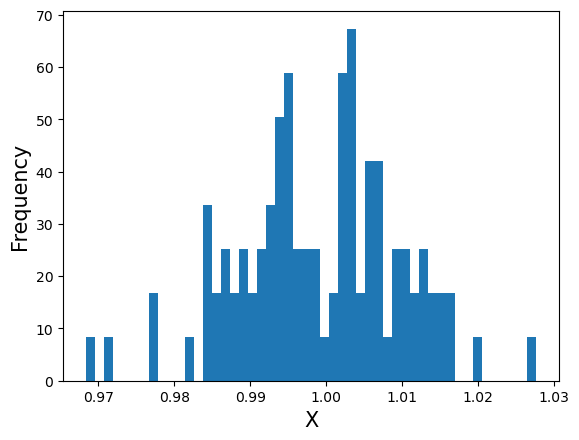

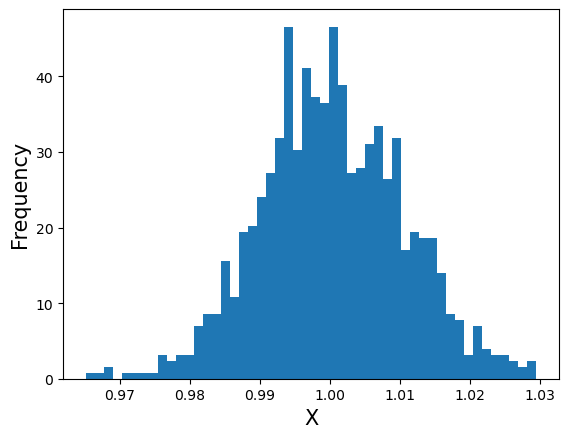

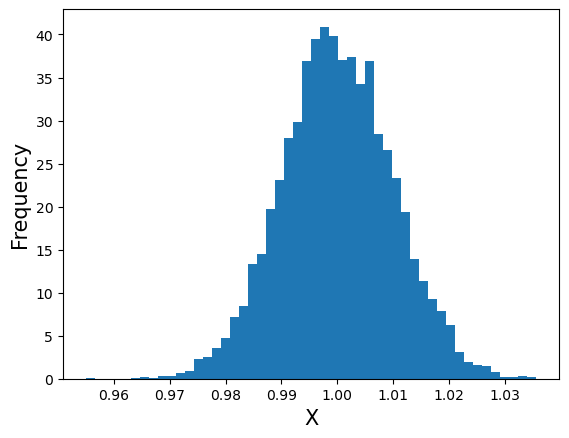

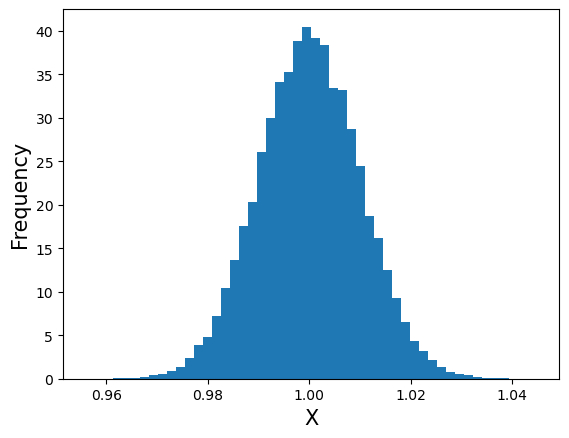

In [8]:
central_limit(10000,100)
central_limit(10000,1000)
central_limit(10000,10000)
central_limit(10000,100000)

### According to central limit theorem, the sampling distribution of the sample means approaches a normal distribution as the sample size increases. The standard deviation of the sampling distribution (standard error) is equal to the population standard deviation divided by the square root of the sample size. This means that as the sample size increases, the standard error decreases, indicating that the sample mean becomes a more precise estimate of the population mean.

### It is clear from the plots that as the sample size increases, it tend towards normal distribution.

### QUESTION 3
### Write functions in python to estimate the covariance, Pearson and Spearman correlation coefficient matrix for any number of random variables.



In [43]:
import numpy as np
from scipy.stats import spearmanr

class Estimates:
    
    def __init__(self, X):
        self.X = X
        
    def cov(self):
        n = len(self.X)
        cov_matrix = np.zeros((n, n))  # Initialize the covariance matrix with zeros

        for i in range(n):
            for j in range(n):
                cov_matrix[i, j] = np.mean(np.multiply((self.X[i] - np.mean(self.X[i])), (self.X[j] - np.mean(self.X[j]))))

        return cov_matrix


    def pearson_correlation(self):
        n = len(self.X)
        pearson_matrix = np.zeros((n, n))

        for i in range(n):
            for j in range(n):
                pearson_matrix[i, j] = ((np.sum(np.multiply(self.X[i], self.X[j])) / len(self.X[i])) - (np.mean(self.X[i]) * np.mean(self.X[j]))) / (np.std(self.X[i]) * np.std(self.X[j]))

        return pearson_matrix

    def spearman_correlation(self):
        n = len(self.X)
        spearman_matrix = np.zeros((n, n))

        for i in range(n):
            for j in range(n):
                rho, _ = spearmanr(self.X[i], self.X[j])
                spearman_matrix[i, j] = rho

        return spearman_matrix

In [44]:
X = [np.random.rand(100) for _ in range(3)]  # Replace with your data
estimates = Estimates(X)
cov_matrix = estimates.cov()
pearson_matrix = estimates.pearson_correlation()
spearman_matrix = estimates.spearman_correlation()

print("Covariance matrix:\n",cov_matrix)
print("\nPearson Correlation Coefficient:\n",pearson_matrix)
print("\nSpearman Correlation Coefficient:\n",spearman_matrix)

Covariance matrix:
 [[ 0.07463749 -0.00749289 -0.01229412]
 [-0.00749289  0.07590157 -0.0071528 ]
 [-0.01229412 -0.0071528   0.0716054 ]]

Pearson Correlation Coefficient:
 [[ 1.         -0.09955092 -0.16816911]
 [-0.09955092  1.         -0.09702368]
 [-0.16816911 -0.09702368  1.        ]]

Spearman Correlation Coefficient:
 [[ 1.         -0.11918392 -0.15823582]
 [-0.11918392  1.         -0.08822082]
 [-0.15823582 -0.08822082  1.        ]]


### QUESTION 4
### Using the above function determine the covariance and Pearson correlation coefficient matrix between the parameters, Epeak, alpha, T90 and Fluence from the GRB catalog.  Display this matrix in the form of a heatmap.

In [31]:
from astropy.table import Table
import matplotlib.pyplot as plt
t1 = Table.read('Fermi_GBM_catalog_15_8_22.txt',format='ascii',guess=False, delimiter='|')

t1.columns

<TableColumns names=('col0','name','ra','dec','trigger_time','t90','t90_error','t90_start','fluence','fluence_error','flnc_band_ampl','flnc_band_ampl_pos_err','flnc_band_ampl_neg_err','flnc_band_epeak','flnc_band_epeak_pos_err','flnc_band_epeak_neg_err','flnc_band_alpha','flnc_band_alpha_pos_err','flnc_band_alpha_neg_err','flnc_band_beta','flnc_band_beta_pos_err','flnc_band_beta_neg_err','_1')>

In [36]:
# Convert individual columns of the Astropy Table to a dictionary
data_dict = {'Epeak': t1['flnc_band_epeak'],'alpha': t1['flnc_band_alpha'],'T90': t1['t90'], 'fluence': t1['fluence']}

import pandas as pd
# Create a DataFrame from the dictionary
df = pd.DataFrame(data_dict)
df.head(20)

,Epeak,alpha,T90,fluence
0,192.80730,-0.946959,4.288,2.396400e-07
1,128.83010,-0.807150,17.408,2.194900e-05
2,226.14300,-0.305663,13.056,1.603100e-06
3,58.01395,-1.077285,12.032,2.988000e-06
4,184.91150,-1.313029,9.216,1.123100e-06
5,537.40860,-1.349118,8.960,1.376500e-06
6,304.32980,-0.489371,0.320,1.401800e-07
7,300.01640,-0.888343,12.288,1.042800e-06
8,422.13630,-1.117029,9.216,3.850300e-07
9,NaN,NaN,81.154,4.081100e-06


In [37]:
df.shape

(3340, 4)

### Dealing with the null values

In [38]:
df.isnull().sum()

Epeak      1032
alpha      1032
T90           1
fluence       1
dtype: int64

In [39]:
# View the missing values
df.select_dtypes(include = (['int64','float64'])).isna().sum()

Epeak      1032
alpha      1032
T90           1
fluence       1
dtype: int64

In [40]:
# select the column
df_num_col = df.select_dtypes(include=['int64', 'float64']).columns

# fill in the missing columns with its median
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace = True)

df.select_dtypes(include = (['int64','float64'])).isna().sum()

Epeak      0
alpha      0
T90        0
fluence    0
dtype: int64

In [41]:
df.head(20)

,Epeak,alpha,T90,fluence
0,192.80730,-0.946959,4.288,2.396400e-07
1,128.83010,-0.807150,17.408,2.194900e-05
2,226.14300,-0.305663,13.056,1.603100e-06
3,58.01395,-1.077285,12.032,2.988000e-06
4,184.91150,-1.313029,9.216,1.123100e-06
5,537.40860,-1.349118,8.960,1.376500e-06
6,304.32980,-0.489371,0.320,1.401800e-07
7,300.01640,-0.888343,12.288,1.042800e-06
8,422.13630,-1.117029,9.216,3.850300e-07
9,163.08610,-0.800453,81.154,4.081100e-06


In [45]:
# Convert DataFrame columns to lists
column_lists = [df[column].tolist() for column in df.columns]

# Create an instance of the Estimates class
estim_grb = Estimates(column_lists)

# Calculate the covariance matrix
cov_matrix_grb = estim_grb.cov()

# Calculate the Pearson correlation matrix
pearson_matrix_grb = estim_grb.pearson_correlation()

# Calculate the Spearman correlation matrix
spearman_matrix_grb = estim_grb.spearman_correlation()

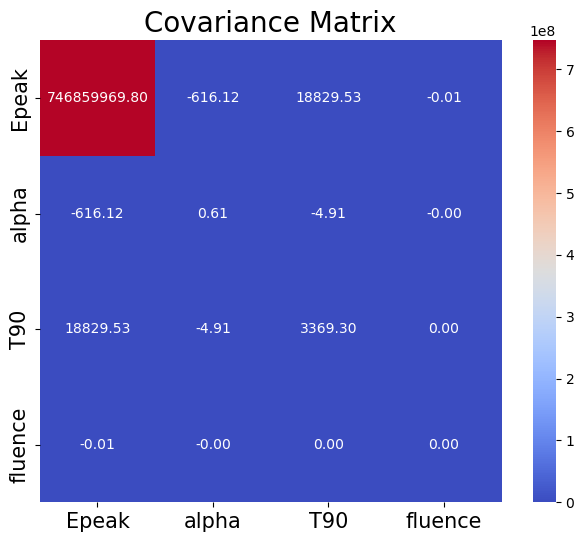

In [46]:
import seaborn as sns

# Get column names for labeling
column_names = df.columns.tolist()

# Display the covariance matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix_grb, annot=True, fmt='.2f', cmap='coolwarm', square=True, xticklabels=column_names, yticklabels=column_names)
plt.title('Covariance Matrix',fontsize = 20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.show()

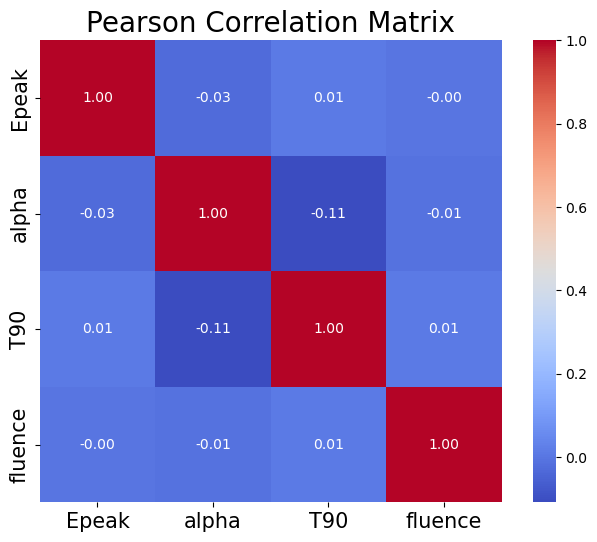

In [47]:
import seaborn as sns

# Display the Pearson Correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_matrix_grb, annot=True, fmt='.2f', cmap='coolwarm', square=True,  xticklabels=column_names, yticklabels=column_names)
plt.title('Pearson Correlation Matrix',fontsize = 20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.show()

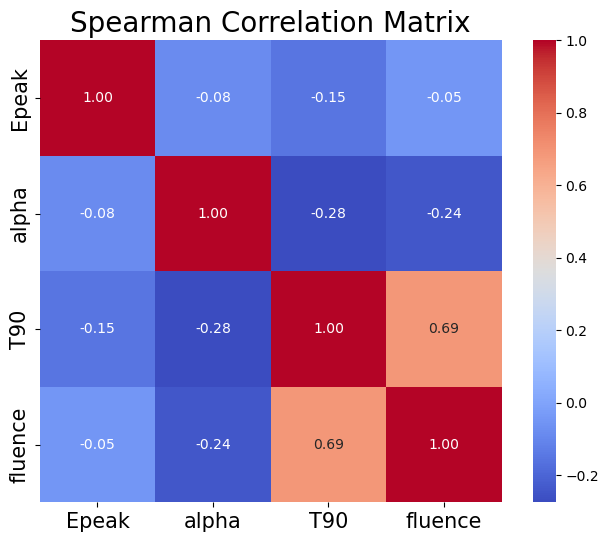

In [48]:
import seaborn as sns

# Display the Spearman Correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_matrix_grb, annot=True, fmt='.2f', cmap='coolwarm', square=True,  xticklabels=column_names, yticklabels=column_names)
plt.title('Spearman Correlation Matrix',fontsize = 20)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15) 
plt.show()

### QUESTION 5
###  Using the uncertainties package and data from Fermi GRB catalog, estimate break energy which is equal to (alpha - beta) * Epeak and the error on break energy. Make a scatter plot of break energy versus Epeak including the errorbars plotted for both x and y quantities.

In [52]:
!pip install uncertainties

     ---------------------------------------- 98.4/98.4 kB 1.1 MB/s eta 0:00:00


In [2]:
t1.columns

<TableColumns names=('col0','name','ra','dec','trigger_time','t90','t90_error','t90_start','fluence','fluence_error','flnc_band_ampl','flnc_band_ampl_pos_err','flnc_band_ampl_neg_err','flnc_band_epeak','flnc_band_epeak_pos_err','flnc_band_epeak_neg_err','flnc_band_alpha','flnc_band_alpha_pos_err','flnc_band_alpha_neg_err','flnc_band_beta','flnc_band_beta_pos_err','flnc_band_beta_neg_err','_1')>

In [32]:
import numpy as np

alpha = t1['flnc_band_alpha']
beta = t1['flnc_band_beta']
Epeak = t1['flnc_band_epeak']

alpha_err = (t1['flnc_band_alpha_pos_err'] + abs(t1['flnc_band_alpha_neg_err']))/2
beta_err = (t1['flnc_band_beta_pos_err'] + abs(t1['flnc_band_beta_neg_err']))/2
Epeak_err = (t1['flnc_band_epeak_pos_err'] + abs(t1['flnc_band_epeak_neg_err']))/2

In [33]:
import uncertainties as unc
import uncertainties.unumpy as unumpy

# Defines uncertainty arrays
A = unumpy.uarray(alpha, alpha_err)
B = unumpy.uarray(beta, beta_err)
E = unumpy.uarray(Epeak, Epeak_err)

In [37]:
break_energy = (alpha - beta)*Epeak

BE= (A-B)*E
b = unumpy.nominal_values(np.array(BE)) 

# Store the propagated error
b_err = unumpy.std_devs(BE) 

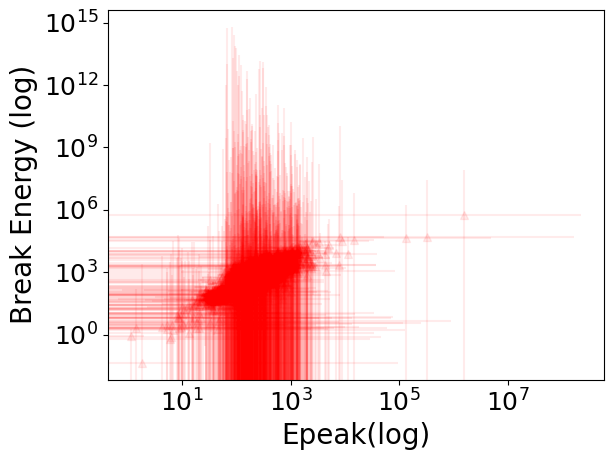

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.errorbar(Epeak, break_energy ,xerr=Epeak_err, yerr=b_err, fmt='r^', alpha=0.08)
plt.tick_params(labelsize=15) 
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Epeak(log)',fontsize=20)
plt.ylabel('Break Energy (log)',fontsize=20)
plt.show()
